<center> Mini project 3 </center>

<center> Steam Game Review </center>

<center> by Anton </center>

Import Librairies

In [1]:
# Basic Librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Natural Language librairies
import string
import regex as re
import spacy
import nltk
from nltk.stem import PorterStemmer
from spacy.lang.en.stop_words import STOP_WORDS
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from wordcloud import WordCloud


#Preproccessing librairies
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

#Machine learning Model
from sklearn.linear_model import LogisticRegression
from sklearn import svm

# metrics librairies
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# Introduction

I am a gamer and I've found my new quest : Predict whether the reviewer recommend a game on Steam.

 Steam is a video game digital distribution service. It's like Amazon but for video games.

 * Like every good online shop, the buyer can write some review to share to other gamer if it worth to buy a specifique game.

 * A game with a good reviews has more chance chance to be buy.
 
 * Unlike Amazon, a review on Steam can only recommend or Not recommend a game (no stars/5)
 
To succeed this quest, a Kaggle data set of Steam will help me.

Let's the game begin !

# Load the data

In [2]:
data_name='train.csv'
df_reviews=pd.read_csv(data_name)
df_reviews.head()

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1


In [3]:
df_reviews['title'].nunique()

44

In [4]:
df_reviews.drop(['review_id','title','year'],axis=1,inplace=True)

#Replace 0 and 1 by 'Not recommended' and 'Recommended'
df_reviews['user_suggestion'].replace({1:'Recommended',0: 'Not recommended'},inplace=True)

df_reviews.head()

,user_review,user_suggestion
0,I'm scared and hearing creepy voices. So I'll...,Recommended
1,"Best game, more better than Sam Pepper's YouTu...",Recommended
2,"A littly iffy on the controls, but once you kn...",Recommended
3,"Great game, fun and colorful and all that.A si...",Recommended
4,Not many games have the cute tag right next to...,Recommended


# EDA

In [5]:
df_reviews.shape

(17494, 2)

17,494 reviews

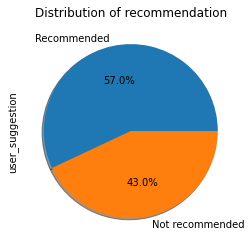

In [6]:
df_reviews['user_suggestion'].value_counts().plot(kind='pie',title="Distribution of recommendation",autopct='%1.1f%%',shadow=True)
plt.show()

- Binary classes (Recommended or not)
- Baseline accurancy : 57% (always predict Recommended)

In [7]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17494 entries, 0 to 17493
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_review      17494 non-null  object
 1   user_suggestion  17494 non-null  object
dtypes: object(2)
memory usage: 273.5+ KB


In [8]:
df_reviews.describe()

,user_review,user_suggestion
count,17494,17494
unique,17490,2
top,#NAME?,Recommended
freq,5,9968


In [9]:
df_reviews['length_review']=df_reviews['user_review'].apply(lambda x : len(x.split()))

## Words scaled

In [10]:
text = ' '.join([rev for rev in df_reviews['user_review']])
count_word=Counter(text.split()).keys()
print(count_word)

dict_keys(["I'm", 'scared', 'and', 'hearing', 'creepy', 'voices.', 'So', "I'll", 'pause', 'for', 'a', 'moment', 'write', 'review', 'while', 'I', 'wait', 'my', 'heart', 'beat', 'to', 'return', 'atleast', 'somewhat', 'calmer', 'times.', 'This', 'game', 'is', 'adorable', 'like', 'happy', 'tree', 'friends', 'but', 'with', 'the', 'graphics', 'sceme', 'of', 'childhood', '(but', 'more', 'bubble', "'clean').", 'Hello', "1990's.What", 'charactes', 'there', 'are', '(that', 'isnot', 'trying', 'kill', 'me)', 'were', 'likable', 'bit', 'odd.', 'did', 'do', 'few', 'noob', 'things', 'though,', 'such', 'as:Oh', 'look', 'class', 'room', 'full', 'ghosts', 'from', 'dead', 'children,', 'lets', 'shine', 'flashlight', 'on', 'them', 'stand', 'staring', 'at', 'them..Or,', 'hmm', 'music,', 'turn', 'around', 'see', 'if', 'can', "what's", 'chasing', 'me.Never', 'before', 'in', 'have', 'been', 'this', 'afraid', 'finding', 'locked', 'door.', 'Best', 'game,', 'better', 'than', 'Sam', "Pepper's", 'YouTube', 'account.

In word scaled, we can identify :
- URL (http://)
- Emojis/No ascii characters (♥♥♥♥♥♥,░░█░░░░░░░░░░░░▄▀)
- Spamming of punctuations (!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!)
- Words not English (三式戦)
- English Mistakes (Januari,locatian)
- F words (F*cking)

## Characters scaled

In [11]:
text = ' '.join([rev for rev in df_reviews['user_review']])
count_word=Counter(text).keys()
print(count_word)

dict_keys(['I', "'", 'm', ' ', 's', 'c', 'a', 'r', 'e', 'd', 'n', 'h', 'i', 'g', 'p', 'y', 'v', 'o', '.', 'S', 'l', 'u', 'f', 't', 'w', 'b', 'T', 'k', '(', ')', 'H', '1', '9', '0', 'W', ',', ':', 'O', 'N', 'B', 'P', 'Y', '/', 'A', 'x', 'F', 'D', '?', 'C', '5', '!', 'G', 'M', 'j', '2', '4', 'E', 'R', '-', 'J', 'z', '6', '=', 'K', 'V', '3', 'Q', 'Z', '7', '8', '#', 'q', 'L', '%', 'â', '™', '¥', 'U', '"', '>', '_', 'X', '♥', ';', '$', '@', '&', '*', '+', '^', '\\', '<', '’', '…', '£', 'Â', 'ヘ', '◕', '。', '░', '▄', '▐', '█', '▀', '▌', '~', '[', ']', 'ı', '▒', '͡', '°', '͜', 'ʖ', '☑', '☐', '{', '}', '‘', '‚', '“', '´', '¯', '`', '·', '¸', '¨', '|', '”', 'ͭ', '̏', '̓', '̦', '̞', '̎', '̂', '͗', '͑', '͌', '̃', '̤', '̺', '̠', 'ͪ', '̌', '̉', 'ͣ', '̧', '͍', '͇', '̼', '̪', '̱', '̫', '͂', '̈', '̽', '̓', '́', '̐', 'ͬ', 'ͩ', '͝', '͈', '̯', '͕', 'ͯ', '̿', '̇', '̘', '̬', '͙', '̝', '̹', '͋', 'ͤ', '͆', '̮', '̖', '̢', '̲', '͎', 'ͅ', '̀', '̾', '̍', '̥', '͓', '̈́', '̔', '̄', '͔', '̚', 'ͨ', '̒', '̊', '̗', '̭'

In characters scaled, we can identify :

- Korean/Mandarin/Japannese/cyrillic characters
- Emojis
- Symbols


## Word cloud before cleaning

In [12]:
#Helper function to display a cloud word

def show_cloud_word(text):

    # Creating word_cloud with text as argument in .generate() method
    word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
    # Display the generated Word Cloud
    plt.figure(figsize=(10,10))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

### All reviews

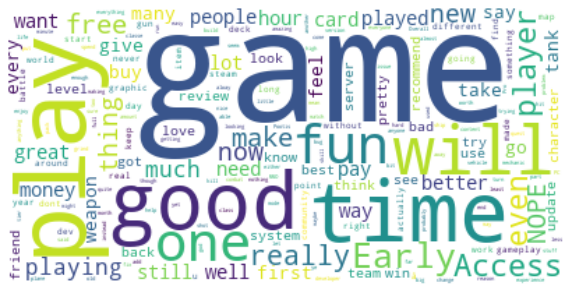

In [13]:
#Creating the text variable
text = ' '.join([rev for rev in df_reviews['user_review']])
top_words_reco=show_cloud_word(text)

### Recommending reviews

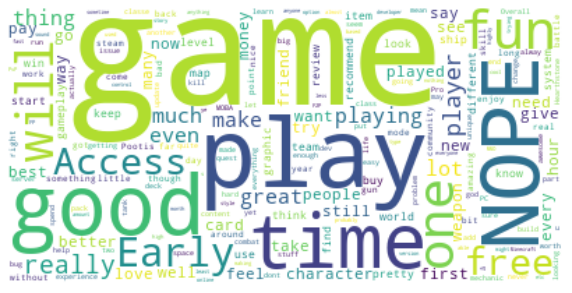

In [14]:
#Creating the text variable
text = ' '.join([rev for rev in df_reviews.loc[df_reviews['user_suggestion']=='Recommended','user_review']])
top_words_reco=show_cloud_word(text)

### Not recommending reviews

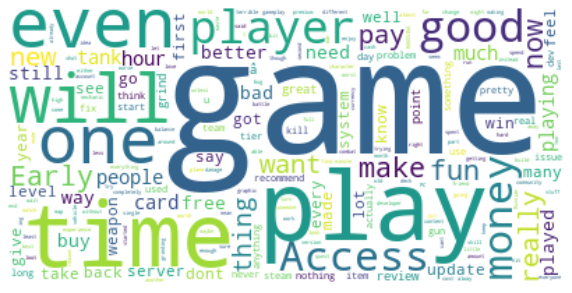

In [15]:
#Creating the text variable
text = ' '.join([rev for rev in df_reviews.loc[df_reviews['user_suggestion']=='Not recommended','user_review']])
show_cloud_word(text)

In [16]:
#length_ review groupby user suggestion

# Data cleaning

## Load English language

In [17]:
#Load English core medium
nlp = spacy.load("en_core_web_md")

In [18]:
# Look the first review
review=df_reviews.iloc[532,0]
review

# Example spamming word : df_reviews.iloc[12,0]
# Example add space between number and character : df_reviews.iloc[12,0]
# Example Emoji : df_reviews.iloc[77,0]
# Example too much no ascii characters : df_reviews.iloc[174,0]

"Cute and basic clickfest game. The artwork is very nice. The novelty wears off pretty quickly, but it's a fun diversion.  Be sure to close out with 'Save and Exit' and your mighty warriors will continue earning coin while you're away!"

## Data preprocessing

### Function

In [19]:
def clean_review(review):
    review = re.sub('http.+\s', '', review)  # remove URLs
    review = re.sub('#.+\s', '', review)  # remove Hashtags
    review = re.sub('(Early Access Review|Product received for free)', '', review)  # remove Early Access Review and Product received for free
    review = re.sub('[!:=(),\+\?]', ' ', review)  # remove punctuations
    review = re.sub('(\d+(\W\d+)?)', r' \1 ', review)
    review = re.sub('\.+', '.', review)  # remove extra dot
    review = re.sub('\s+', ' ', review)  # remove extra whitespace
    review = re.sub('\s$', '', review)  # remove extra whitespace
    
    # Remove word spamming (more than 30% of the review)
    review = ' '.join([word for word in review.split() if not review.count(word)>0.3*len(review.split())])
    
    # Remove word with more than 40 letters
    review = ' '.join([word for word in review.split() if len(word)<40])
    
    temp=[]
    for char in review:
        if ord(char) >= 128 or ord(char) <= 0:
            char=''
        temp.append(char)
        
    review=''.join(temp)
    return review

### Example

In [20]:
clean_review(review)

"Cute and basic clickfest game. The artwork is very nice. The novelty wears off pretty quickly but it's fun diversion. Be sure to close out with 'Save and Exit' and your mighty warriors will continue earning coin while you're away"

## Tokenisation

### Function

In [21]:
def tokenisation(review):
    return nlp(review)

### Example

In [22]:
# Display the 15 first token
[token for token in tokenisation(review)][:15]

[Cute,
 and,
 basic,
 clickfest,
 game,
 .,
 The,
 artwork,
 is,
 very,
 nice,
 .,
 The,
 novelty,
 wears]

## Remove Stops words

### Function

In [23]:
def remove_stops(review):
    
    """
    
    Remove all stops words
    
    """

    review = tokenisation(review)
    review = [token.text for token in review if nlp.vocab[token.text].is_stop == False]
    
    return ' '.join(review)

### Example

In [24]:
remove_stops(review)

"Cute basic clickfest game . artwork nice . novelty wears pretty quickly , fun diversion .   sure close ' Save Exit ' mighty warriors continue earning coin away !"

## Lemmatisation (SpaCy)

### Function

In [25]:
def lemmatisation(review):
    
    """
    
    Lemmatize all words
    
    """
    
    review=tokenisation(review)
    review=[token.lemma_ for token in review]
    
    return ' '.join(review)

### Example

In [26]:
lemmatisation(review)

"cute and basic clickfest game . the artwork be very nice . the novelty wear off pretty quickly , but it be a fun diversion .   be sure to close out with ' Save and exit ' and your mighty warrior will continue earn coin while you be away !"

## Stemming (NLTK)

### Function

In [27]:
def stemming(review):
    
    """
    
    Stemmatize all words
    
    """
    
    review=tokenisation(review)
    ps=PorterStemmer()

    review=[ps.stem(token.text) for token in review]
    
    return ' '.join(review)

### Example

In [28]:
stemming(review)

"cute and basic clickfest game . the artwork is veri nice . the novelti wear off pretti quickli , but it 's a fun divers .   be sure to close out with ' save and exit ' and your mighti warrior will continu earn coin while you 're away !"

## Remove punctuation

### Function

In [29]:
def remove_punctuation(review):
    
    """
    
    Remove all kind of punctuation
    
    """
    
    review = [char for char in review if char not in string.punctuation]
    
    return ''.join(review)

### Example

In [30]:
remove_punctuation(review)

'Cute and basic clickfest game The artwork is very nice The novelty wears off pretty quickly but its a fun diversion  Be sure to close out with Save and Exit and your mighty warriors will continue earning coin while youre away'

## Full Tokenizer

In [31]:
def tokenizer_review(review,clean=True,stops=True,lemma=True,stemm=True,punct=True):
    
#     print(review)
    
    if clean:
        review=clean_review(review)
#         print(review)
    
    if stops:
        review=remove_stops(review)
#         print(review)
        
    if lemma:
        review=lemmatisation(review)
#         print(review)

    if stemm:
        review=stemming(review)
#         print(review)

    if punct:
        review=remove_punctuation(review)
#         print(review)
        
    return review

In [32]:
tokenizer_review(review)

'cute basic clickfest game  artwork nice  novelti wear pretti quickli fun divers  sure close  save exit  mighti warrior continu earn coin away'

In [33]:
def remove_top_com_freq(review,top_words_common):
    
    """
    
    Remove the top words commun to both classes 
    
    """
    review = [word for word in review.split() if word not in top_words_common]
    
    return ' '.join(review)

In [34]:
%%time
import_csv=True

if import_csv:
    # 200ms to run 
    df_reviews=pd.read_csv('dataframe.csv')
    
else :
    
    #15 minutes to run
    %time df_reviews['review_Clean_Stops_Lemma_Punct']=df_reviews['user_review'].apply(lambda x : tokenizer_review(x))
    print('review_Clean_Stops_Lemma_Punct : Done')
    
    # Count the top 20 most frequent words for users who recommend the game
    text = ' '.join([rev for rev in df_reviews.loc[df_reviews['user_suggestion']=='Recommended','review_Clean_Stops_Lemma_Punct']])
    count_rec=[word[0] for word in Counter(text.split()).most_common(20)]
    print(count_rec)
    
    # Count the top 20 most frequent words for users who don't recommend the game
    text = ' '.join([rev for rev in df_reviews.loc[df_reviews['user_suggestion']=='Not recommended','review_Clean_Stops_Lemma_Punct']])
    count_not_rec=[word[0] for word in Counter(text.split()).most_common(20)]
    print(count_not_rec)
    
    # Extract the commun words between this 2 top 20
    top_words_common=[word for word in count_rec if word in count_not_rec]
    print(top_words_common)
    
    # Remove these commun words from every review
    df_reviews['review_Clean_Stops_Lemma_Punct']=df_reviews['review_Clean_Stops_Lemma_Punct'].apply(lambda x : remove_top_com_freq(x,top_words_common))
    
    #Add feature 'length_cleaned_review'
    df_reviews['length_cleaned_review']=df_reviews['review_Clean_Stops_Lemma_Punct'].apply(lambda x : len(x.split()))
    
    #Drop the cleaned reviews with less than 3 words ()
    df_reviews.drop(df_reviews[df_reviews['length_cleaned_review'] < 3].index, inplace=True)
    
    # Export to .csv
    df_reviews.to_csv('dataframe.csv',index=False)

df_reviews.head()

CPU times: total: 141 ms
Wall time: 156 ms


,user_review,user_suggestion,length_review,review_Clean_Stops_Lemma_Punct,length_cleaned_review
0,I'm scared and hearing creepy voices. So I'll...,Recommended,132,scare hear creepi voic paus moment write revie...,56
1,"Best game, more better than Sam Pepper's YouTu...",Recommended,44,well sam pepper youtub account 1010 need compu...,29
2,"A littly iffy on the controls, but once you kn...",Recommended,70,littli iffi control know easi master floor 100...,31
3,"Great game, fun and colorful and all that.A si...",Recommended,47,great color note window mode comput hate fulls...,17
4,Not many games have the cute tag right next to...,Recommended,67,cute tag right horror tag steam late 2014 come...,18


## World cloud after preprocessing

### All reviews

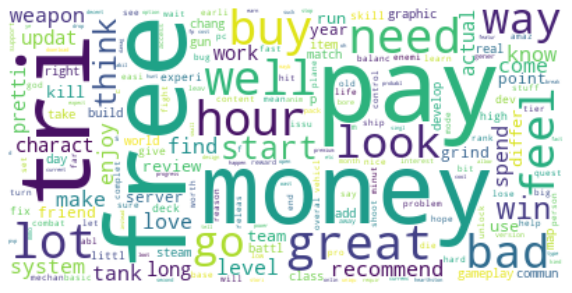

In [35]:
#Creating the text variable
text = ' '.join([rev for rev in df_reviews['review_Clean_Stops_Lemma_Punct']])
show_cloud_word(text)

### Recommending reviews

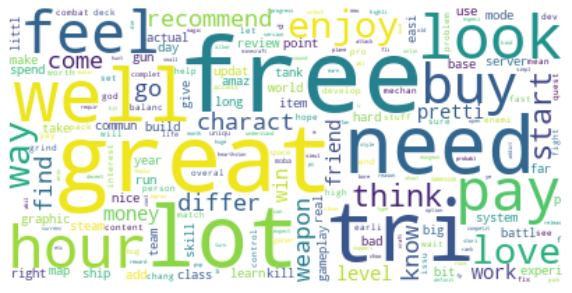

In [36]:
#Creating the text variable
text = ' '.join([rev for rev in df_reviews.loc[df_reviews['user_suggestion']=='Recommended','review_Clean_Stops_Lemma_Punct']])
_=show_cloud_word(text)

### Not recommending reviews

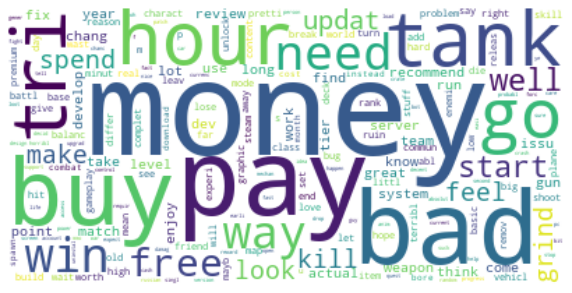

In [37]:
#Creating the text variable
text = ' '.join([rev for rev in df_reviews.loc[df_reviews['user_suggestion']=='Not recommended','review_Clean_Stops_Lemma_Punct']])
_=show_cloud_word(text)

# Vectorisation, Modelling and Evaluation

In [38]:
def model_evaluation(model,classes,X_train,y_train,X_test,y_test,eval_testset=False,conf_mtrx=True,verbose=True):
    
    if isinstance(model,Pipeline):
        name_model='|'.join([str(step[1]) for step in model.get_params(deep=False)['steps']])
    else:
        name_model=str(model).split("(")[0]
        
    if verbose:
        print(80*'=')
        print(name_model.center(80,'-'))
        print(80*'=')
    
    model.fit(X_train,y_train)
    acc_training=round(model.score(X_train,y_train),3)
    acc_test=round(model.score(X_test, y_test),3)
    
    #Display Confusion matrix and print classification report
    if conf_mtrx :    
        if eval_testset:
            X=X_test
            y=y_test
            set_name='test set'
        else: 
            X=X_train
            y=y_train
            set_name='training set'
    
        y_pred_class = model.predict(X)
        cm=confusion_matrix(y, y_pred_class,labels=classes)    

        disp =ConfusionMatrixDisplay(cm,display_labels=classes)
        disp.plot()
        plt.title(f'Confusion matrix for the {set_name} \n {name_model}')
        plt.xticks(rotation=45)
        plt.show()

        print(classification_report(y, y_pred_class))
    #END IF conf_mtrx
    
#     acc_trainingCV=cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
#     acc_trainingCV=round(acc_training.mean(),3)
    
    if verbose:    
        print('Score training set : ', acc_training)
    #     print('Score training set with Cross Validation : ', acc_trainingCV)
        print(f'Score test set : {acc_test} \n')
        
    return name_model,(acc_training,acc_test)

## Define Target and features

In [39]:
X=df_reviews[['user_review','review_Clean_Stops_Lemma_Punct']]
y=df_reviews['user_suggestion']
classes=['Recommended','Not recommended']

## Split the data

In [40]:
# Split the datasets into training set and test set 
X_train_full, X_test_full, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

## Modelling without preprocessing

--------------CountVectorizer()|LogisticRegression(max_iter=1000)---------------


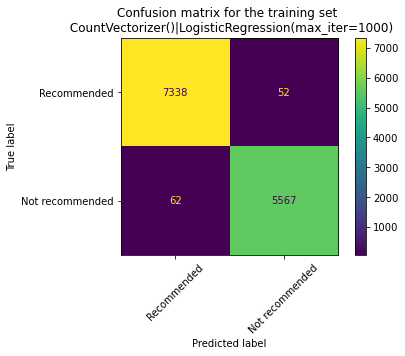

                 precision    recall  f1-score   support

Not recommended       0.99      0.99      0.99      5629
    Recommended       0.99      0.99      0.99      7390

       accuracy                           0.99     13019
      macro avg       0.99      0.99      0.99     13019
   weighted avg       0.99      0.99      0.99     13019

Score training set :  0.991
Score test set : 0.85 

CPU times: total: 24.5 s
Wall time: 6.01 s


,Acc_training,Acc_test
CountVectorizer()|LogisticRegression(max_iter=1000),0.991,0.85


In [41]:
%%time

X_train=X_train_full['user_review']
X_test=X_test_full['user_review']

df_acc=pd.DataFrame(columns=['Acc_training','Acc_test'])

vectorizers=[CountVectorizer()]
classifiers=[LogisticRegression(max_iter=1000)]


for classifier in classifiers:
    for vectorizer in vectorizers :
        
        pipe = Pipeline([('vectorizer', vectorizer),
                         ('classifier', classifier)])
        name_model,acc=model_evaluation(pipe,classes,X_train,y_train,X_test,y_test)
        df_acc.loc[name_model,:]=acc
        
df_acc

## Modelling with preprocessing

In [42]:
X_train=X_train_full['review_Clean_Stops_Lemma_Punct']
X_test=X_test_full['review_Clean_Stops_Lemma_Punct']

### CountVectorizer/TfidfVectorizer with LogisticRegression/SVM

--------------CountVectorizer()|LogisticRegression(max_iter=1000)---------------


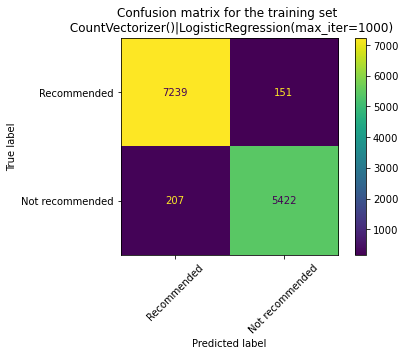

                 precision    recall  f1-score   support

Not recommended       0.97      0.96      0.97      5629
    Recommended       0.97      0.98      0.98      7390

       accuracy                           0.97     13019
      macro avg       0.97      0.97      0.97     13019
   weighted avg       0.97      0.97      0.97     13019

Score training set :  0.973
Score test set : 0.828 

CPU times: total: 6.03 s
Wall time: 2.21 s
--------------TfidfVectorizer()|LogisticRegression(max_iter=1000)---------------


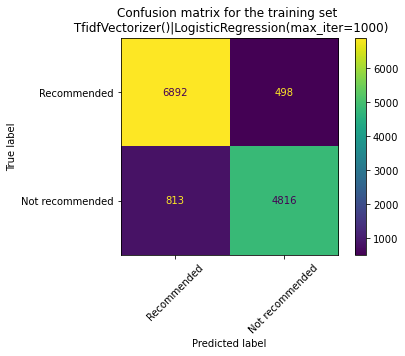

                 precision    recall  f1-score   support

Not recommended       0.91      0.86      0.88      5629
    Recommended       0.89      0.93      0.91      7390

       accuracy                           0.90     13019
      macro avg       0.90      0.89      0.90     13019
   weighted avg       0.90      0.90      0.90     13019

Score training set :  0.899
Score test set : 0.852 

CPU times: total: 3.06 s
Wall time: 1.53 s
----------------------------CountVectorizer()|SVC()-----------------------------


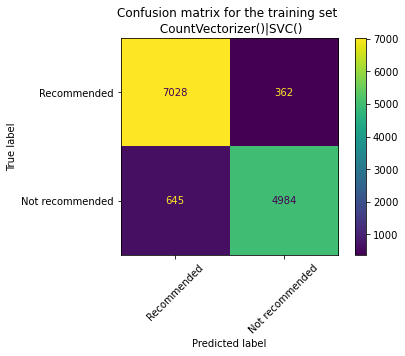

                 precision    recall  f1-score   support

Not recommended       0.93      0.89      0.91      5629
    Recommended       0.92      0.95      0.93      7390

       accuracy                           0.92     13019
      macro avg       0.92      0.92      0.92     13019
   weighted avg       0.92      0.92      0.92     13019

Score training set :  0.923
Score test set : 0.84 

CPU times: total: 1min 38s
Wall time: 1min 41s
----------------------------TfidfVectorizer()|SVC()-----------------------------


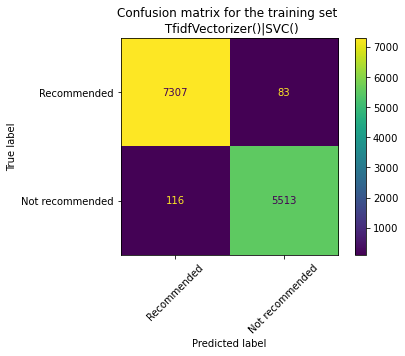

                 precision    recall  f1-score   support

Not recommended       0.99      0.98      0.98      5629
    Recommended       0.98      0.99      0.99      7390

       accuracy                           0.98     13019
      macro avg       0.98      0.98      0.98     13019
   weighted avg       0.98      0.98      0.98     13019

Score training set :  0.985
Score test set : 0.856 

CPU times: total: 2min 23s
Wall time: 2min 42s
CPU times: total: 4min 11s
Wall time: 4min 28s


,Acc_training,Acc_test
CountVectorizer()|LogisticRegression(max_iter=1000),0.973,0.828
TfidfVectorizer()|LogisticRegression(max_iter=1000),0.899,0.852
CountVectorizer()|SVC(),0.923,0.84
TfidfVectorizer()|SVC(),0.985,0.856


In [43]:
%%time

df_acc=pd.DataFrame(columns=['Acc_training','Acc_test'])

vectorizers=[CountVectorizer(),TfidfVectorizer()]
classifiers=[LogisticRegression(max_iter=1000),svm.SVC()]


for classifier in classifiers:
    for vectorizer in vectorizers :
        
        pipe = Pipeline([('vectorizer', vectorizer),
                         ('classifier', classifier)])
        %time name_model,acc=model_evaluation(pipe,classes,X_train,y_train,X_test,y_test)
        df_acc.loc[name_model,:]=acc
        
df_acc

Both of estimator overfit the training model.

## Reduction the value of max_feature of the Vectorizer

### CountVectorizer

In [44]:
%%time
df_acc=pd.DataFrame(columns=['Acc_training','Acc_test'])


nb_max_features=np.linspace(1,2000,20,dtype=int)
vectorizers=[CountVectorizer(ngram_range=(1,1),max_features=i) for i in nb_max_features] 

classifiers=[LogisticRegression(max_iter=1000)]


for classifier in classifiers:
    for vectorizer in vectorizers :
        
        pipe = Pipeline([('vectorizer', vectorizer),
                         ('classifier', classifier)])
        name_model,acc=model_evaluation(pipe,classes,X_train,y_train,X_test,y_test,eval_testset=False,conf_mtrx=False,verbose=False)
        df_acc.loc[name_model,:]=acc

CPU times: total: 17.8 s
Wall time: 20.4 s


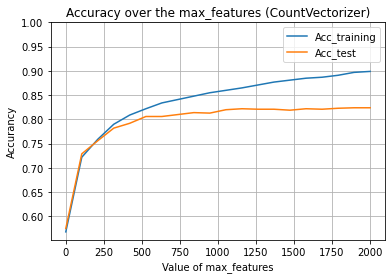

In [45]:
plt.plot(nb_max_features,df_acc['Acc_training'],label='Acc_training')
plt.plot(nb_max_features,df_acc['Acc_test'],label='Acc_test')
plt.legend()
plt.title('Accuracy over the max_features (CountVectorizer)')
plt.xlabel('Value of max_features')
plt.ylabel('Accurancy')
plt.ylim(top=1)
plt.grid()
plt.show()

### TfidfVectorizer

In [46]:
%%time
df_acc=pd.DataFrame(columns=['Acc_training','Acc_test'])

nb_max_features=np.linspace(1,2000,20,dtype=int)
vectorizers=[TfidfVectorizer(ngram_range=(1,1),max_features=i) for i in nb_max_features] 

classifiers=[LogisticRegression(max_iter=1000)]


for classifier in classifiers:
    for vectorizer in vectorizers :
        
        pipe = Pipeline([('vectorizer', vectorizer),
                         ('classifier', classifier)])
        name_model,acc=model_evaluation(pipe,classes,X_train,y_train,X_test,y_test,eval_testset=False,conf_mtrx=False,verbose=False)
        df_acc.loc[name_model,:]=acc

CPU times: total: 16.2 s
Wall time: 18.3 s


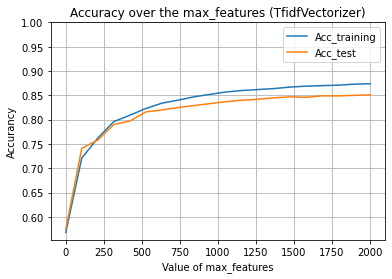

In [47]:
plt.plot(nb_max_features,df_acc['Acc_training'],label='Acc_training')
plt.plot(nb_max_features,df_acc['Acc_test'],label='Acc_test')
plt.legend()
plt.title('Accuracy over the max_features (TfidfVectorizer)')
plt.xlabel('Value of max_features')
plt.ylabel('Accurancy')
plt.ylim(top=1)
plt.grid()
plt.show()

# Conclusion

We can predict whether the reviewer recommend a game with an accuracy of ~84%  

Recommendations :
* Optimize estimator
* Try to understand the reason of misclassifications (sarcasm,…)
* Analyse with Part of Speech
